# Observations

- KL divergence depends on the length of the trace a model is being trained on
- Length scaling does not seem to have an affect
- A fraction of traces in the middle length does not seem to have this effect
- This motivates the restriction of trace lengths (25000-140000) based on the self predictability difference between them.
- When doing cross testing(model trained on one trace and tested on other) the likelihood of the model seems to be correlated with testing trace length and not training trace length. This is interesting!!
- The results from self inference test may be an artifact of the second phenomenon(cross testing) observed.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
import seaborn as sns
import pandas as pd

from scipy import stats

import sys

import utils.trace_metric as trace_metric

In [3]:
seeds = [1, 3, 6, 9]

result = {}

with open('test_configs/results/result_5466508.pkl', 'rb') as f:
    result = pkl.load(f)
    
trace_list = result.keys()

In [4]:
trace_list

dict_keys(['pmd-small-HotSpot-d-l64-p4096-w100000i.analyzed-1.pkl', 'pmd-small-JikesRVM-d-l64-p4096-w100000i.analyzed-1.pkl', 'perlbmk-ref-perlbmk6-d-l64-p4096-w100000i.analyzed-1.pkl', 'pmd-small-7-JikesRVM-d-l64-p4096-w100000i.analyzed-1.pkl', 'pmd-small-9-JikesRVM-d-l64-p4096-w100000i.analyzed-1.pkl', 'pmd-small-J9-d-l64-p4096-w100000i.analyzed-1.pkl', 'pmd-small-8-JikesRVM-d-l64-p4096-w100000i.analyzed-1.pkl', 'luindex-small-JikesRVM-d-l64-p4096-w100000i.analyzed-1.pkl', 'luindex-small-HotSpot-d-l64-p4096-w100000i.analyzed-1.pkl', 'xalan-small-JikesRVM-d-l64-p4096-w100000i.analyzed-1.pkl', 'sunflow-small-HotSpot-d-l64-p4096-w100000i.analyzed-1.pkl', 'lusearch-small-JikesRVM-d-l64-p4096-w100000i.analyzed-1.pkl', 'fop-small-HotSpot-d-l64-p4096-w100000i.analyzed-1.pkl', 'avrora-small-HotSpot-d-l64-p4096-w100000i.analyzed-1.pkl', 'gcc-ref-cc12-d-l64-p4096-w100000i.analyzed-1.pkl', 'gcc-ref-cc15-d-l64-p4096-w100000i.analyzed-1.pkl', 'sunflow-small-JikesRVM-d-l64-p4096-w100000i.analyzed-

In [5]:
with open('test_configs/results/trace_length_dict.pkl', 'rb') as f:
    trace_length_dict = pkl.load(f)

In [6]:
trace_length_dict['wupwise-ref-wupwise-d-l64-p4096-w100000i.analyzed-1'][0]

trace_length_dict = { key: val[0] for key, val in trace_length_dict.items() }

In [7]:
trace_length_dict

{'wupwise-ref-wupwise-d-l64-p4096-w100000i.analyzed-1': 3633057,
 'xalan-default-J9-d-l64-p4096-w100000i.analyzed-1': 228269,
 'fop-small-HotSpot-d-l64-p4096-w100000i.analyzed-1': 71050,
 'xalan-small-JikesRVM-d-l64-p4096-w100000i.analyzed-1': 52515,
 'mcf-ref-mcf-d-l64-p4096-w100000i.analyzed-1': 453500,
 'xalan-default-HotSpot-d-l64-p4096-w100000i.analyzed-1': 221292,
 'luindex-small-JikesRVM-d-l64-p4096-w100000i.analyzed-1': 30811,
 'lucas-ref-lucas-d-l64-p4096-w100000i.analyzed-1': 2858648,
 'equake-ref-equake-d-l64-p4096-w100000i.analyzed-1': 1019616,
 'jython-default-HotSpot-d-l64-p4096-w100000i.analyzed-1': 749053,
 'fop-default-J9-d-l64-p4096-w100000i.analyzed-1': 147646,
 'pmd-small-2-JikesRVM-d-l64-p4096-w100000i.analyzed-1': 23818,
 'apsi-ref-apsi-d-l64-p4096-w100000i.analyzed-1': 4094971,
 'eclipse-default-JikesRVM-d-l64-p4096-w100000i.analyzed-1': 835300,
 'lusearch-small-HotSpot-d-l64-p4096-w100000i.analyzed-1': 84023,
 'eclipse-small-HotSpot-d-l64-p4096-w100000i.analyzed

# Self Inteference Test

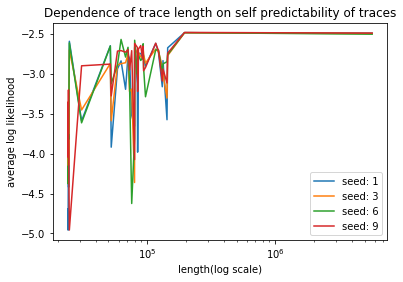

In [8]:
for seed in seeds:
    length_list = []
    avgkl_list = []
#     print("Seed: {}".format(seed))
    for trace in trace_list:
#         print("Trace: {}".format(trace))
        
        test_kldiv = []
        
#         print(result[trace][trace][seed].keys())
        
        for key in result[trace][trace][seed].keys():
#             print("key: {}".format(key))
#             print(result[trace][trace][seed][key]["average_kldivergence"])
            try:
                test_kldiv.append(-result[trace][trace][seed][key]["average_loglikelihood"])
            except IndexError:
                continue
        
        average_kldiv = np.mean(test_kldiv)
#         print("Kl divergence: {}".format(average_kldiv))
        
        length_list.append(trace_length_dict[trace.split('.p')[0]])
        avgkl_list.append(average_kldiv)
    
    sort_ids = np.argsort(length_list)
#     print(sort_ids)
    
    plt.plot(np.array(length_list)[sort_ids], 
                np.array(avgkl_list)[sort_ids], 
                label="seed: {}".format(seed))

plt.legend()
plt.xlabel("length(log scale)")
plt.xscale("log")
plt.ylabel("average log likelihood")
plt.title("Dependence of trace length on self predictability of traces")
# plt.show()
plt.savefig("trace_correlation.png")

# Length scaled

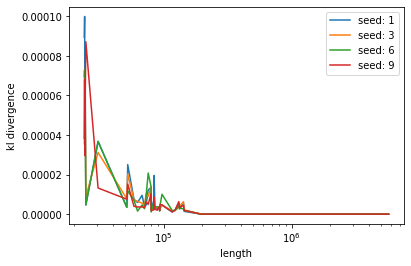

In [9]:
for seed in seeds:
    length_list = []
    avgkl_list = []
#     print("Seed: {}".format(seed))
    for trace in trace_list:
#         print("Trace: {}".format(trace))
        
        test_kldiv = []
        
#         print(result[trace][trace][seed].keys())
        
        for key in result[trace][trace][seed].keys():
#             print("key: {}".format(key))
#             print(result[trace][trace][seed][key]["average_kldivergence"])
            try:
                test_kldiv.append(result[trace][trace][seed][key]["average_kldivergence"])
            except IndexError:
                continue
        
        average_kldiv = np.mean(test_kldiv)
#         print("Kl divergence: {}".format(average_kldiv))
        
        length_list.append(trace_length_dict[trace.split('.p')[0]])
        avgkl_list.append(average_kldiv/length_list[-1])
    
    sort_ids = np.argsort(length_list)
#     print(sort_ids)
    
    plt.plot(np.array(length_list)[sort_ids], 
                np.array(avgkl_list)[sort_ids], 
                label="seed: {}".format(seed))

plt.legend()
plt.xlabel("length")
plt.xscale("log")
plt.ylabel("kl divergence")
plt.show()

# Find the range of trace lengths

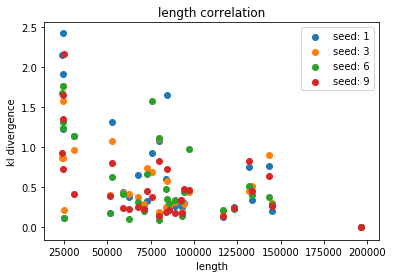

In [10]:
for seed in seeds:
    length_list = []
    avgkl_list = []
#     print("Seed: {}".format(seed))
    for trace in trace_list:
#         print("Trace: {}".format(trace))
        
        test_kldiv = []
        
#         print(result[trace][trace][seed].keys())
        
        for key in result[trace][trace][seed].keys():
#             print("key: {}".format(key))
#             print(result[trace][trace][seed][key]["average_kldivergence"])
            try:
                test_kldiv.append(result[trace][trace][seed][key]["average_kldivergence"])
            except IndexError:
                continue
        
        average_kldiv = np.mean(test_kldiv)
#         print("Kl divergence: {}".format(average_kldiv))
        
        length_list.append(trace_length_dict[trace.split('.p')[0]])
        avgkl_list.append(average_kldiv)
    
    sort_ids = np.argsort(length_list)
#     print(sort_ids)
    
    plt.scatter(np.array(length_list)[sort_ids][0:-1], 
                np.array(avgkl_list)[sort_ids][0:-1], 
                label="seed: {}".format(seed))
    
plt.legend()
plt.xlabel("length")
# plt.xscale("log")
plt.ylabel("kl divergence")
plt.title("length correlation")
plt.show()

number of points: 23


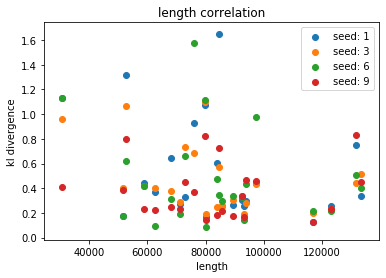

In [11]:
for seed in seeds:
    length_list = []
    avgkl_list = []
#     print("Seed: {}".format(seed))
    for trace in trace_list:
        if trace_length_dict[trace.split('.p')[0]] < 25000 or \
        trace_length_dict[trace.split('.p')[0]] > 140000:
#             pass
            continue
        
        test_kldiv = []
        
#         print(result[trace][trace][seed].keys())
        
        for key in result[trace][trace][seed].keys():
#             print("key: {}".format(key))
#             print(result[trace][trace][seed][key]["average_kldivergence"])
            try:
                test_kldiv.append(result[trace][trace][seed][key]["average_kldivergence"])
            except IndexError:
                continue
        
        average_kldiv = np.mean(test_kldiv)
#         print("Kl divergence: {}".format(average_kldiv))
        
        length_list.append(trace_length_dict[trace.split('.p')[0]])
        avgkl_list.append(average_kldiv)
    
    sort_ids = np.argsort(length_list)
#     print(sort_ids)
    
    plt.scatter(np.array(length_list)[sort_ids], 
                np.array(avgkl_list)[sort_ids], 
                label="seed: {}".format(seed))

print("number of points: {}".format(len(length_list)))
plt.legend()
plt.xlabel("length")
# plt.xscale("log")
plt.ylabel("kl divergence")
plt.title("length correlation")
plt.show()

# Cross Inference test

In [12]:
trace_list1 = trace_list

trace_list1 = [ trace for trace in trace_list1 if trace_length_dict[trace.split('.p')[0]] >= 25000 and \
              trace_length_dict[trace.split('.p')[0]] <= 140000 ]

print(len(trace_list1))

23


number of points: 992


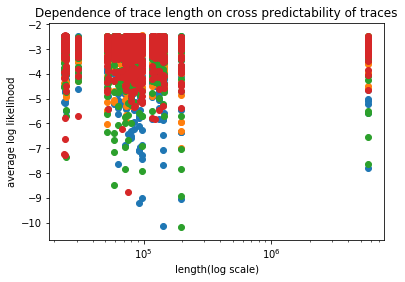

In [13]:

for seed in seeds:
    length_list = []
    avgkl_list = []
    #     print("Seed: {}".format(seed))
    for trace_train in trace_list:
        for trace_test in trace_list:

            if trace_train == trace_test:
                continue
            
            test_kldiv = []
            
            for key in result[trace_train][trace_test][seed].keys():
                try:
                    test_kldiv.append(-result[trace_train][trace_test][seed][key]["average_loglikelihood"])
                except IndexError:
                    continue

            average_kldiv = np.mean(test_kldiv)

            length_list.append(trace_length_dict[trace_train.split('.p')[0]])
            avgkl_list.append(average_kldiv)

    sort_ids = np.argsort(length_list)
    plt.scatter(np.array(length_list)[sort_ids], 
            np.array(avgkl_list)[sort_ids])

print("number of points: {}".format(len(length_list)))
# plt.legend()
plt.xlabel("length(log scale)")
plt.xscale("log")
plt.ylabel("average log likelihood")
plt.title("Dependence of trace length on cross predictability of traces")
plt.show()
# plt.savefig("train_trace_length_correlation_cross.png")


# Cross Inference test

Since we know how the train trace length effects predictability we need to know how test trace length effects

number of points: 992


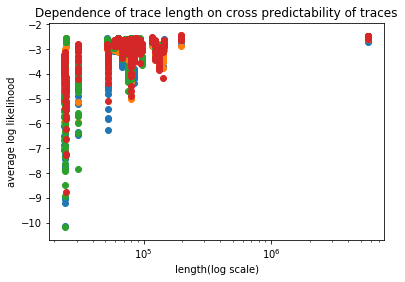

In [14]:

for seed in seeds:
    length_list = []
    avgkl_list = []
    #     print("Seed: {}".format(seed))
    for trace_train in trace_list:
        for trace_test in trace_list:

            if trace_train == trace_test:
                continue
            
            test_kldiv = []
            
            for key in result[trace_train][trace_test][seed].keys():
                try:
                    test_kldiv.append(-result[trace_train][trace_test][seed][key]["average_loglikelihood"])
                except IndexError:
                    continue

            average_kldiv = np.mean(test_kldiv)

            length_list.append(trace_length_dict[trace_test.split('.p')[0]])
            avgkl_list.append(average_kldiv)

    sort_ids = np.argsort(length_list)
    plt.scatter(np.array(length_list)[sort_ids], 
            np.array(avgkl_list)[sort_ids])

print("number of points: {}".format(len(length_list)))
# plt.legend()
plt.xlabel("length(log scale)")
plt.xscale("log")
plt.ylabel("average log likelihood")
plt.title("Dependence of trace length on cross predictability of traces")
plt.show()
# plt.savefig("test_trace_length_correlation_cross.png")

## Subsampled

number of points: 506


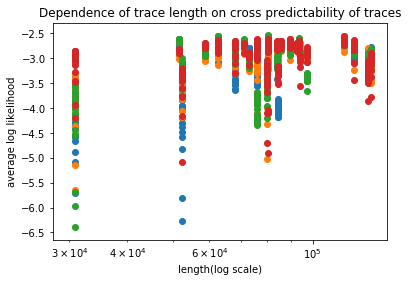

In [15]:

for seed in seeds:
    length_list = []
    avgkl_list = []
    #     print("Seed: {}".format(seed))
    for trace_train in trace_list1:
        for trace_test in trace_list1:

            if trace_train == trace_test:
                continue
            
            test_kldiv = []
            
            for key in result[trace_train][trace_test][seed].keys():
                try:
                    test_kldiv.append(-result[trace_train][trace_test][seed][key]["average_loglikelihood"])
                except IndexError:
                    continue

            average_kldiv = np.mean(test_kldiv)

            length_list.append(trace_length_dict[trace_test.split('.p')[0]])
            avgkl_list.append(average_kldiv)

    sort_ids = np.argsort(length_list)
    plt.scatter(np.array(length_list)[sort_ids], 
            np.array(avgkl_list)[sort_ids])

print("number of points: {}".format(len(length_list)))
# plt.legend()
plt.xlabel("length(log scale)")
plt.xscale("log")
plt.ylabel("average log likelihood")
plt.title("Dependence of trace length on cross predictability of traces")
plt.show()

In [16]:
# Find nomralizing factor for trace lengths

# length_norm = 0
# for key in trace_length_dict.keys():
#     length_norm += trace_length_dict[key]

len_list = [ trace_length_dict[key] for key in trace_length_dict.keys() ]
    
length_norm = np.mean(len_list)
length_min = np.min(len_list)
length_min

10928

## Rescaled

number of points: 506


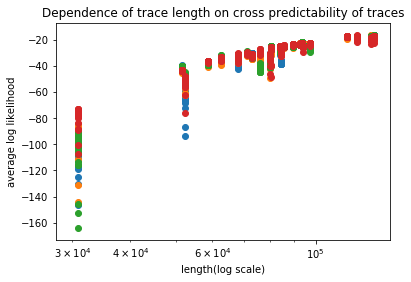

In [17]:

for seed in seeds:
    length_list = []
    avgkl_list = []
    #     print("Seed: {}".format(seed))
    for trace_train in trace_list1:
        for trace_test in trace_list1:

            if trace_train == trace_test:
                continue
            
            test_kldiv = []
            
            for key in result[trace_train][trace_test][seed].keys():
                try:
                    test_kldiv.append(-result[trace_train][trace_test][seed][key]["average_loglikelihood"])
                except IndexError:
                    continue

            average_kldiv = np.mean(test_kldiv)

            # factor computation
            len_factor = trace_length_dict[trace_test.split('.p')[0]]/length_norm
            
            length_list.append(trace_length_dict[trace_test.split('.p')[0]])
            avgkl_list.append(average_kldiv/(len_factor))

    sort_ids = np.argsort(length_list)
    plt.scatter(np.array(length_list)[sort_ids], 
            np.array(avgkl_list)[sort_ids])

print("number of points: {}".format(len(length_list)))
# plt.legend()
plt.xlabel("length(log scale)")
plt.xscale("log")
plt.ylabel("average log likelihood")
plt.title("Dependence of trace length on cross predictability of traces")
plt.show()
# plt.savefig("test_trace_length_correlation_cross.png")

## Only first 50%

number of points: 961


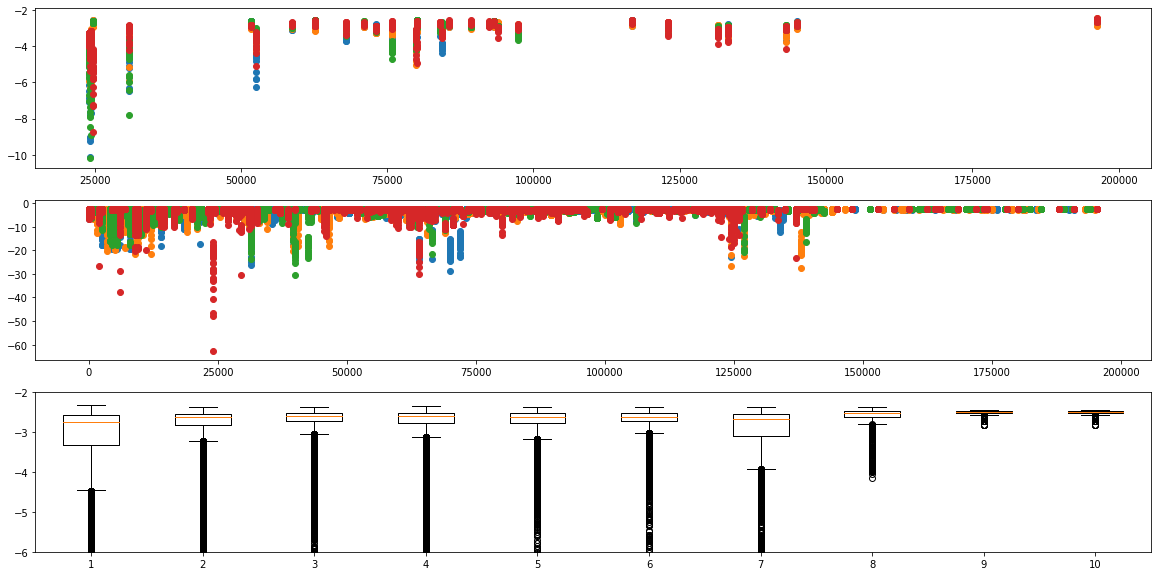

In [18]:
fig, axs = plt.subplots(3, 1, figsize=(20,10))

boxplot_dict = {}

for seed in seeds:
    length_list = []
    trace_point = []
    kl_list = []
    avgkl_list = []
    #     print("Seed: {}".format(seed))
    for trace_train in trace_list:
        for trace_test in trace_list:

            if trace_train == trace_test:
                continue
            
            if trace_length_dict[trace_test.split('.p')[0]] > 1000000:
                continue
            
            test_kldiv = []
            
            for key in result[trace_train][trace_test][seed].keys():
                test_trace_length = trace_length_dict[trace_train.split('.p')[0]]
                
                try:
#                     if key > length_min:
#                         continue
                    test_kldiv.append(-result[trace_train][trace_test][seed][key]["average_loglikelihood"])
                    
                    trace_point.append(key)
                    kl_list.append(test_kldiv[-1])
                    
                except (IndexError, TypeError):
                    continue

            average_kldiv = np.mean(test_kldiv)

            # factor computation
            len_factor = trace_length_dict[trace_test.split('.p')[0]]/length_norm
            
            length_list.append(trace_length_dict[trace_test.split('.p')[0]])
            avgkl_list.append(average_kldiv)

    sort_ids = np.argsort(length_list)
    axs[0].scatter(np.array(length_list)[sort_ids], 
            np.array(avgkl_list)[sort_ids])
    
    sort_ids = np.argsort(trace_point)
    axs[1].scatter(np.array(trace_point)[sort_ids], 
            np.array(kl_list)[sort_ids])
    
    for idx, point in enumerate(trace_point):
        point_trace_p = 20000
        if int(point/point_trace_p) not in boxplot_dict.keys():
            boxplot_dict[int(point/point_trace_p)] = []
            
        boxplot_dict[int(point/point_trace_p)].append(kl_list[idx])
        
#     axs[1].scatter(np.array(trace_points)[sort_ids], 
#             np.array(avgkl_list)[sort_ids])

print("number of points: {}".format(len(length_list)))
# plt.legend()
# axs[0].xlabel("length(log scale)")
# axs[0].xscale("log")
# axs[0].ylabel("average log likelihood")
# axs[0].title("Dependence of trace length on cross predictability of traces")

key_list = np.sort(list(boxplot_dict.keys()))

boxplot_mat = [ boxplot_dict[key] for key in key_list ]
axs[2].set_ylim([ -6, -2 ])
axs[2].boxplot(boxplot_mat)

plt.show()
# plt.savefig("test_trace_length_correlation_cross.png")

In [19]:
list(trace_list)

['pmd-small-HotSpot-d-l64-p4096-w100000i.analyzed-1.pkl',
 'pmd-small-JikesRVM-d-l64-p4096-w100000i.analyzed-1.pkl',
 'perlbmk-ref-perlbmk6-d-l64-p4096-w100000i.analyzed-1.pkl',
 'pmd-small-7-JikesRVM-d-l64-p4096-w100000i.analyzed-1.pkl',
 'pmd-small-9-JikesRVM-d-l64-p4096-w100000i.analyzed-1.pkl',
 'pmd-small-J9-d-l64-p4096-w100000i.analyzed-1.pkl',
 'pmd-small-8-JikesRVM-d-l64-p4096-w100000i.analyzed-1.pkl',
 'luindex-small-JikesRVM-d-l64-p4096-w100000i.analyzed-1.pkl',
 'luindex-small-HotSpot-d-l64-p4096-w100000i.analyzed-1.pkl',
 'xalan-small-JikesRVM-d-l64-p4096-w100000i.analyzed-1.pkl',
 'sunflow-small-HotSpot-d-l64-p4096-w100000i.analyzed-1.pkl',
 'lusearch-small-JikesRVM-d-l64-p4096-w100000i.analyzed-1.pkl',
 'fop-small-HotSpot-d-l64-p4096-w100000i.analyzed-1.pkl',
 'avrora-small-HotSpot-d-l64-p4096-w100000i.analyzed-1.pkl',
 'gcc-ref-cc12-d-l64-p4096-w100000i.analyzed-1.pkl',
 'gcc-ref-cc15-d-l64-p4096-w100000i.analyzed-1.pkl',
 'sunflow-small-JikesRVM-d-l64-p4096-w100000i.ana

number of points: 31


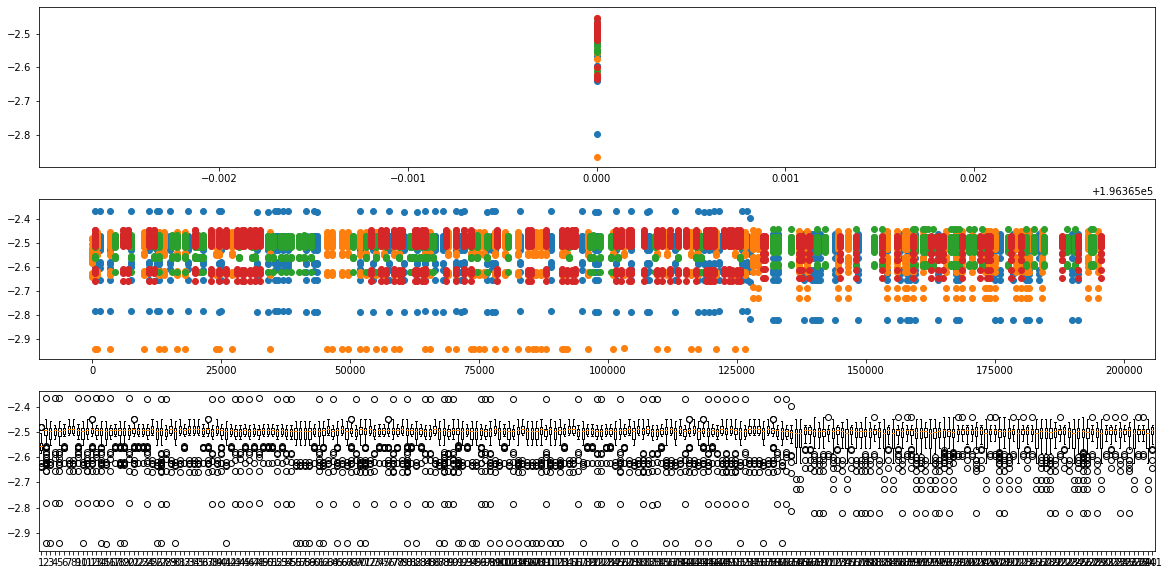

In [20]:
fig, axs = plt.subplots(3, 1, figsize=(20,10))

boxplot_dict = {}

trace_list = list(trace_list)
trace_list1 = [ trace_list[2] ]

for seed in seeds:
    length_list = []
    trace_point = []
    kl_list = []
    avgkl_list = []
    #     print("Seed: {}".format(seed))
    for trace_train in trace_list:
        for trace_test in trace_list1:

            if trace_train == trace_test:
                continue
            
            if trace_length_dict[trace_test.split('.p')[0]] > 1000000:
                continue
            
            test_kldiv = []
            
            for key in result[trace_train][trace_test][seed].keys():
                test_trace_length = trace_length_dict[trace_train.split('.p')[0]]
                
                try:
#                     if key > length_min:
#                         continue
                    test_kldiv.append(-result[trace_train][trace_test][seed][key]["average_loglikelihood"])
                    
                    trace_point.append(key)
                    kl_list.append(test_kldiv[-1])
                    
                except (IndexError, TypeError):
                    continue

            average_kldiv = np.mean(test_kldiv)

            # factor computation
            len_factor = trace_length_dict[trace_test.split('.p')[0]]/length_norm
            
            length_list.append(trace_length_dict[trace_test.split('.p')[0]])
            avgkl_list.append(average_kldiv)

    sort_ids = np.argsort(length_list)
    axs[0].scatter(np.array(length_list)[sort_ids], 
            np.array(avgkl_list)[sort_ids])
    
    sort_ids = np.argsort(trace_point)
    axs[1].scatter(np.array(trace_point)[sort_ids], 
            np.array(kl_list)[sort_ids])
    
    for idx, point in enumerate(trace_point):
        point_trace_p = 300
        if int(point/point_trace_p) not in boxplot_dict.keys():
            boxplot_dict[int(point/point_trace_p)] = []
            
        boxplot_dict[int(point/point_trace_p)].append(kl_list[idx])
        
#     axs[1].scatter(np.array(trace_points)[sort_ids], 
#             np.array(avgkl_list)[sort_ids])

print("number of points: {}".format(len(length_list)))
# plt.legend()
# axs[0].xlabel("length(log scale)")
# axs[0].xscale("log")
# axs[0].ylabel("average log likelihood")
# axs[0].title("Dependence of trace length on cross predictability of traces")

key_list = np.sort(list(boxplot_dict.keys()))

boxplot_mat = [ boxplot_dict[key] for key in key_list ]
# axs[2].set_ylim([ -6, -2 ])
axs[2].boxplot(boxplot_mat)

plt.show()
# plt.savefig("test_trace_length_correlation_cross.png")

number of points: 128
0. trace test: pmd-small-HotSpot-d-l64-p4096-w100000i.analyzed-1.pkl


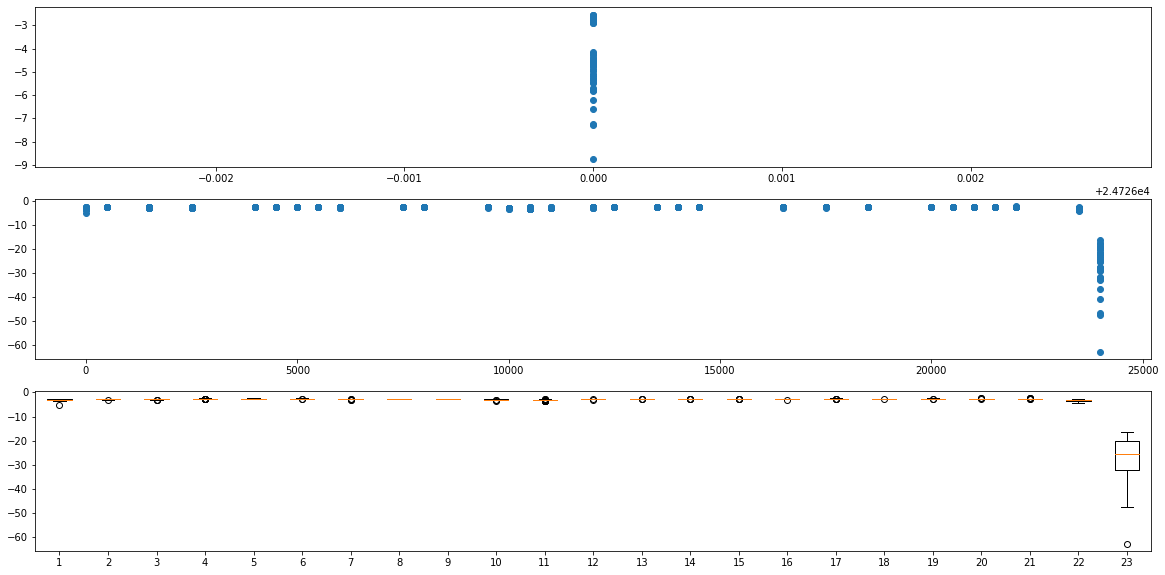

number of points: 128
1. trace test: pmd-small-JikesRVM-d-l64-p4096-w100000i.analyzed-1.pkl


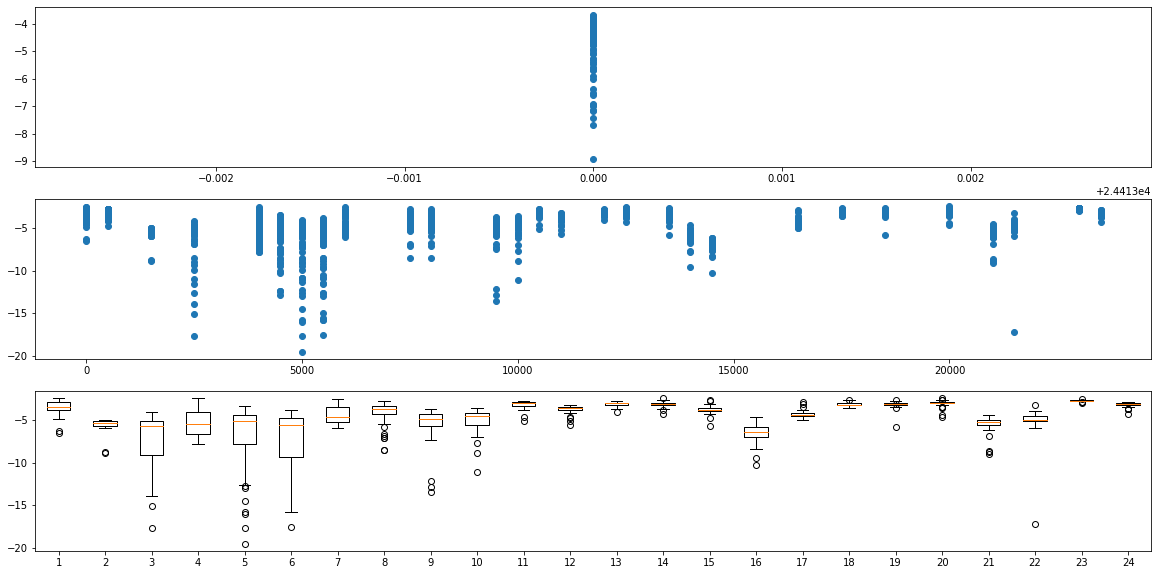

number of points: 128
2. trace test: perlbmk-ref-perlbmk6-d-l64-p4096-w100000i.analyzed-1.pkl


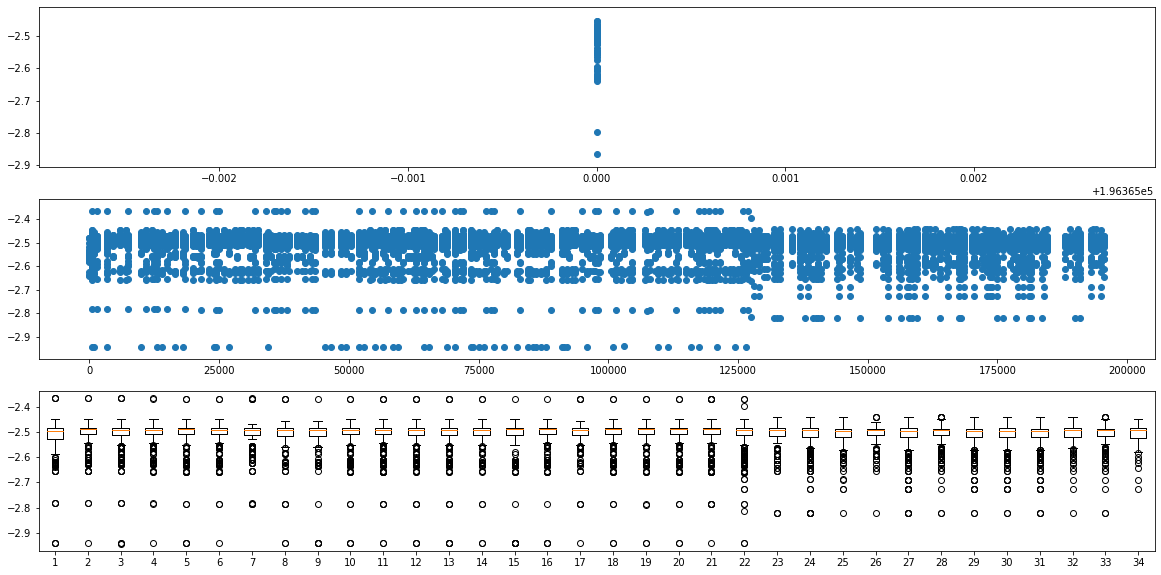

number of points: 128
3. trace test: pmd-small-7-JikesRVM-d-l64-p4096-w100000i.analyzed-1.pkl


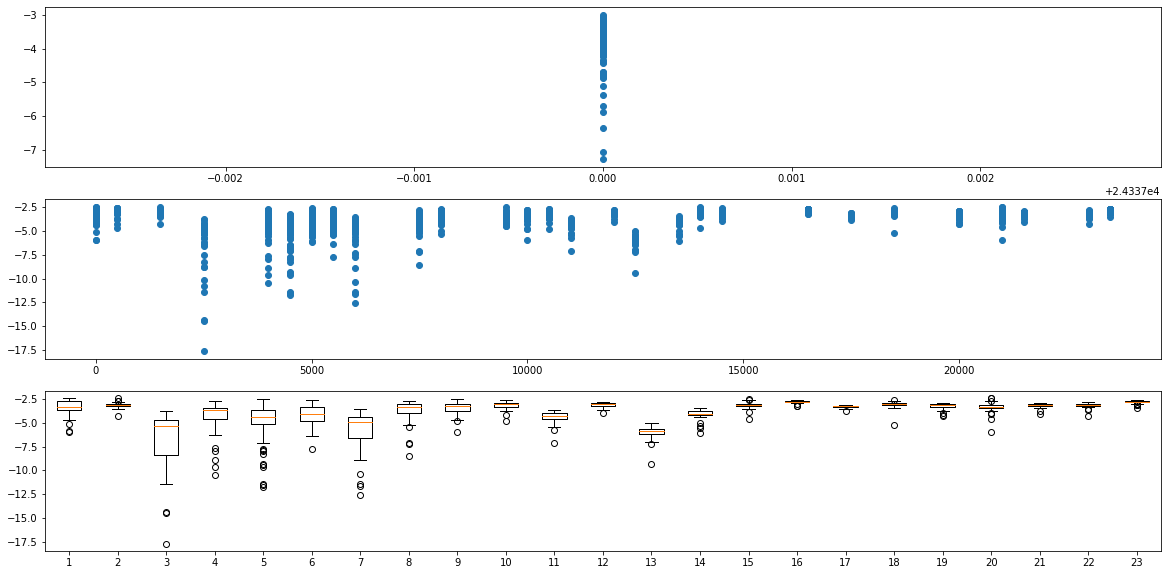

number of points: 128
4. trace test: pmd-small-9-JikesRVM-d-l64-p4096-w100000i.analyzed-1.pkl


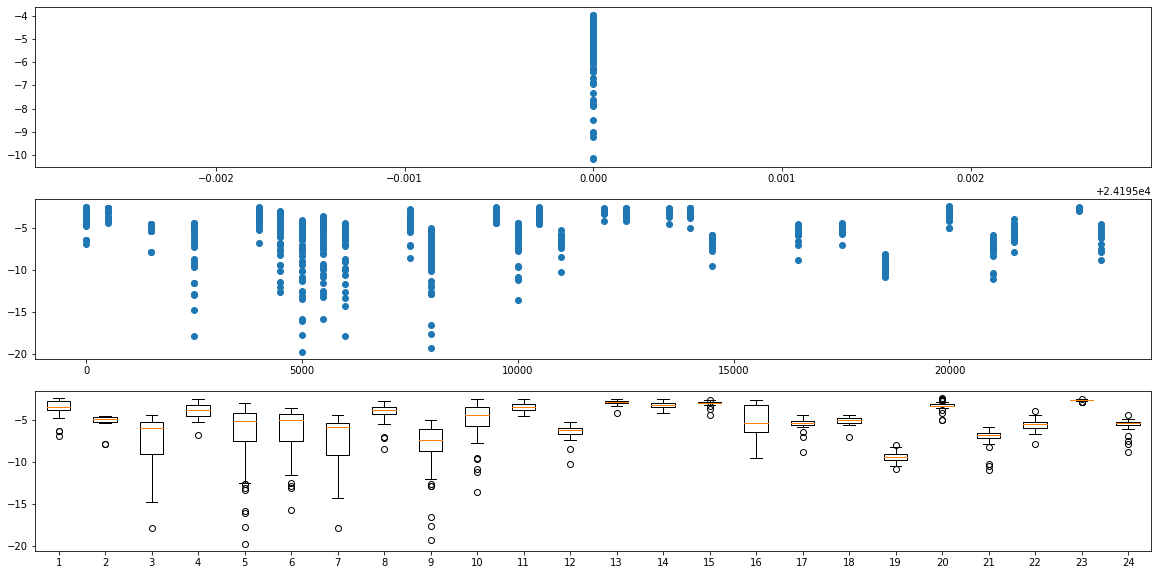

number of points: 128
5. trace test: pmd-small-J9-d-l64-p4096-w100000i.analyzed-1.pkl


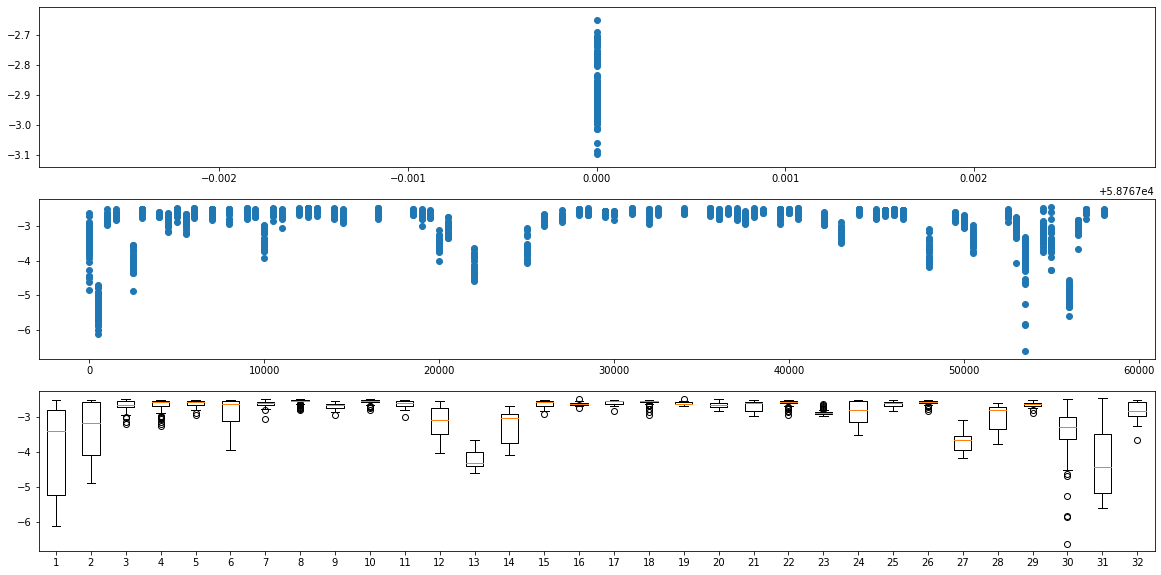

number of points: 128
6. trace test: pmd-small-8-JikesRVM-d-l64-p4096-w100000i.analyzed-1.pkl


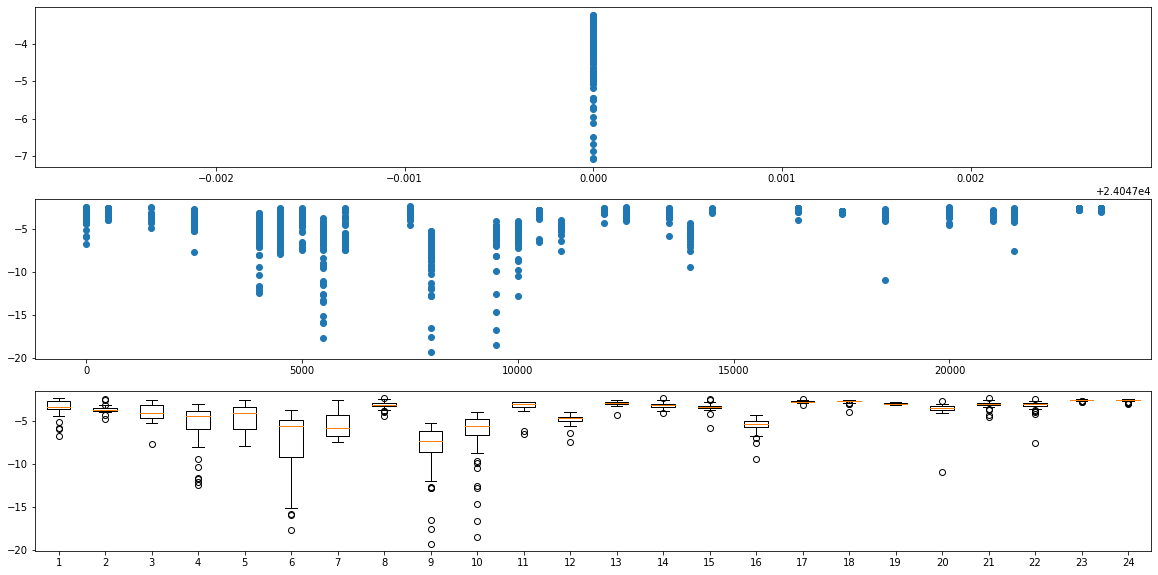

number of points: 128
7. trace test: luindex-small-JikesRVM-d-l64-p4096-w100000i.analyzed-1.pkl


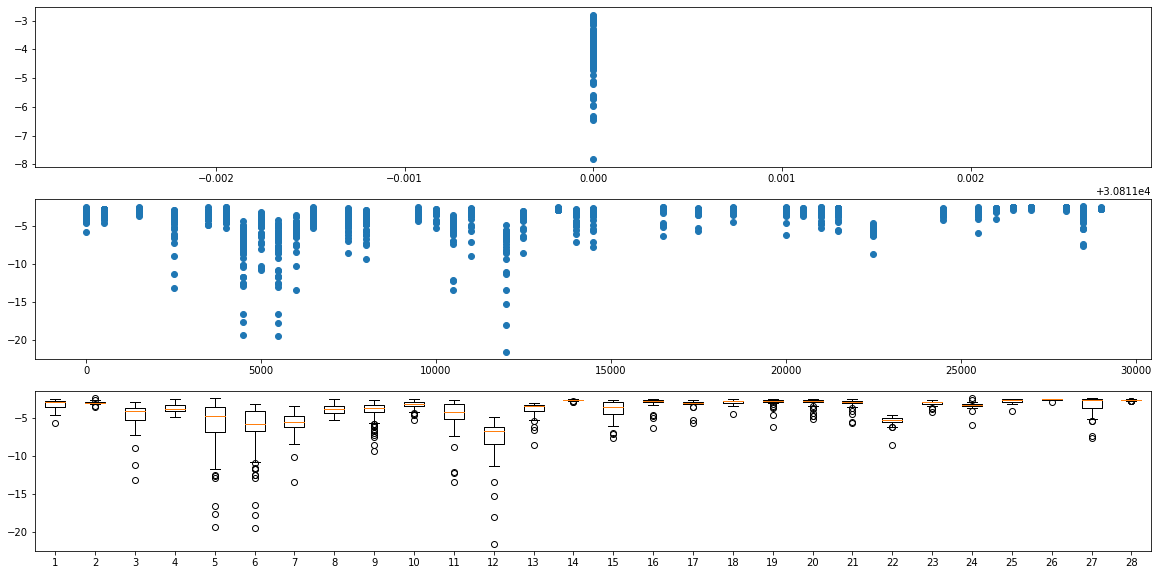

number of points: 128
8. trace test: luindex-small-HotSpot-d-l64-p4096-w100000i.analyzed-1.pkl


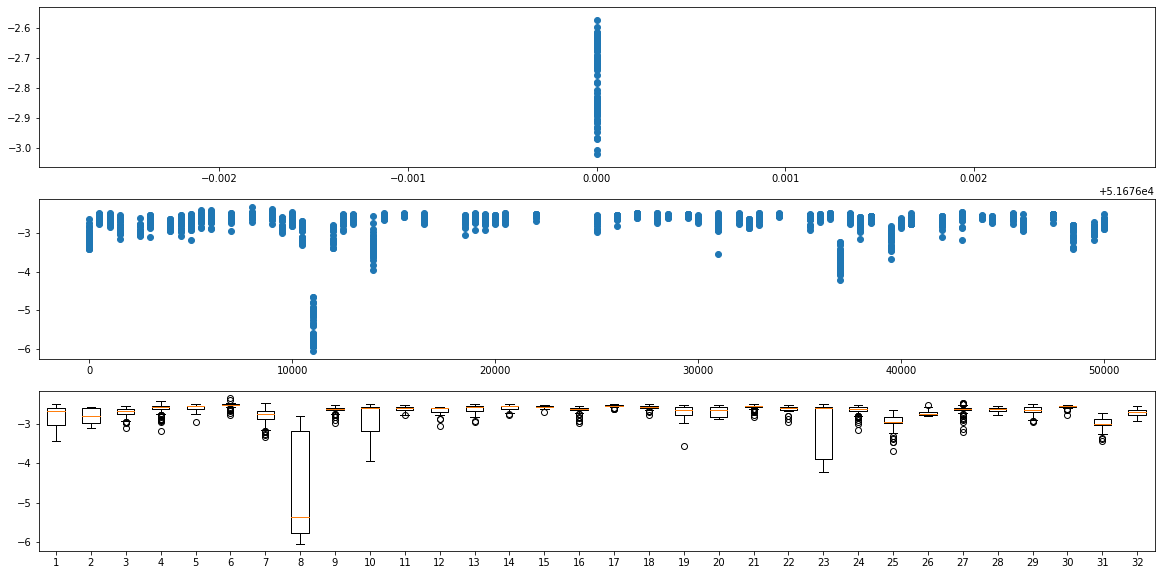

number of points: 128
9. trace test: xalan-small-JikesRVM-d-l64-p4096-w100000i.analyzed-1.pkl


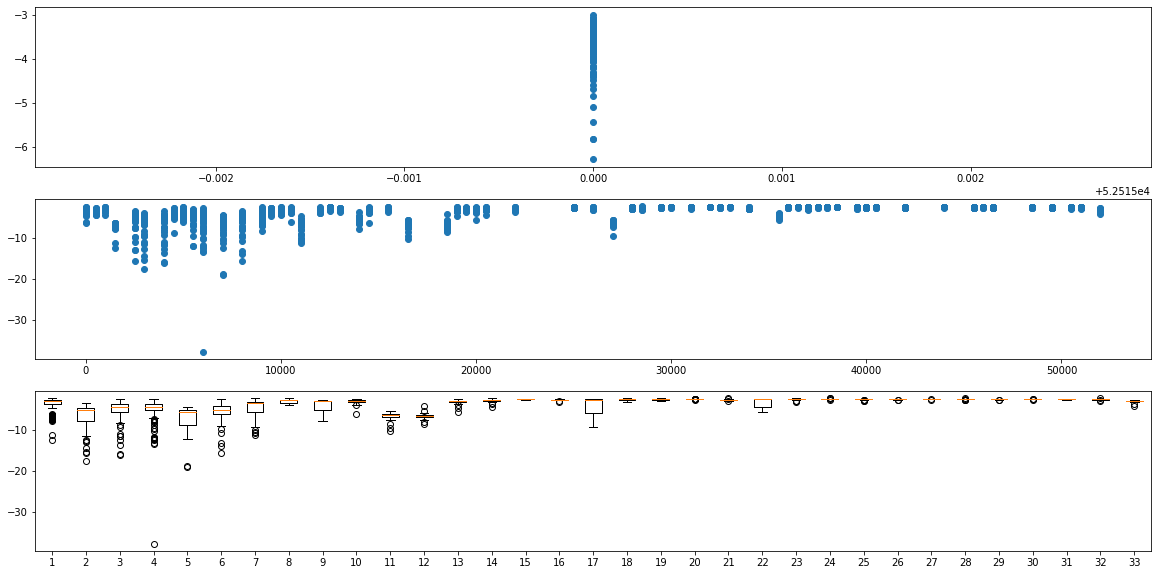

number of points: 128
10. trace test: sunflow-small-HotSpot-d-l64-p4096-w100000i.analyzed-1.pkl


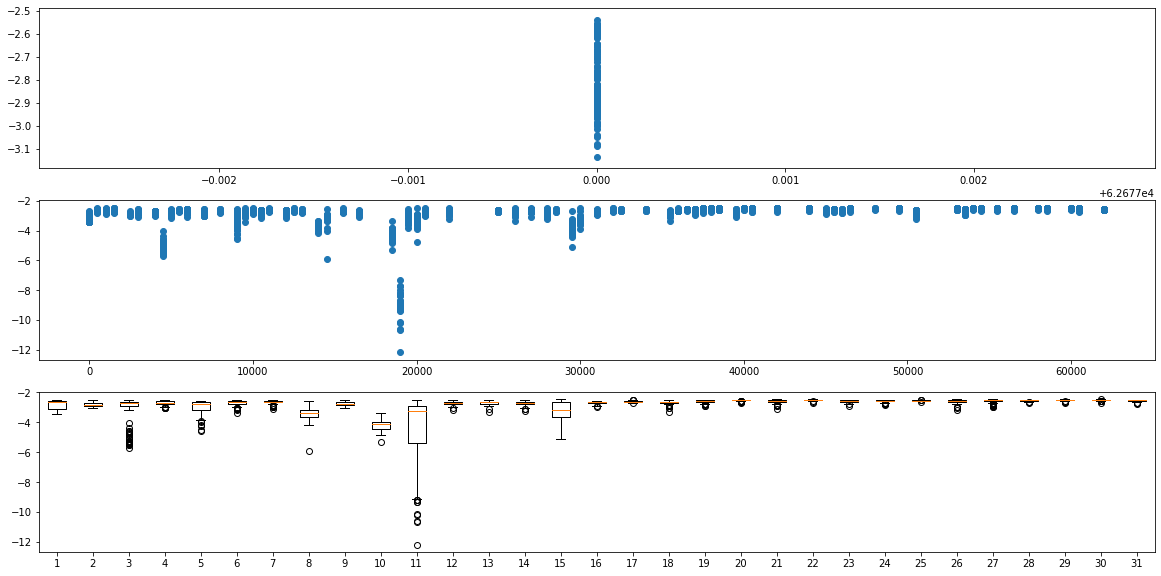

number of points: 128
11. trace test: lusearch-small-JikesRVM-d-l64-p4096-w100000i.analyzed-1.pkl


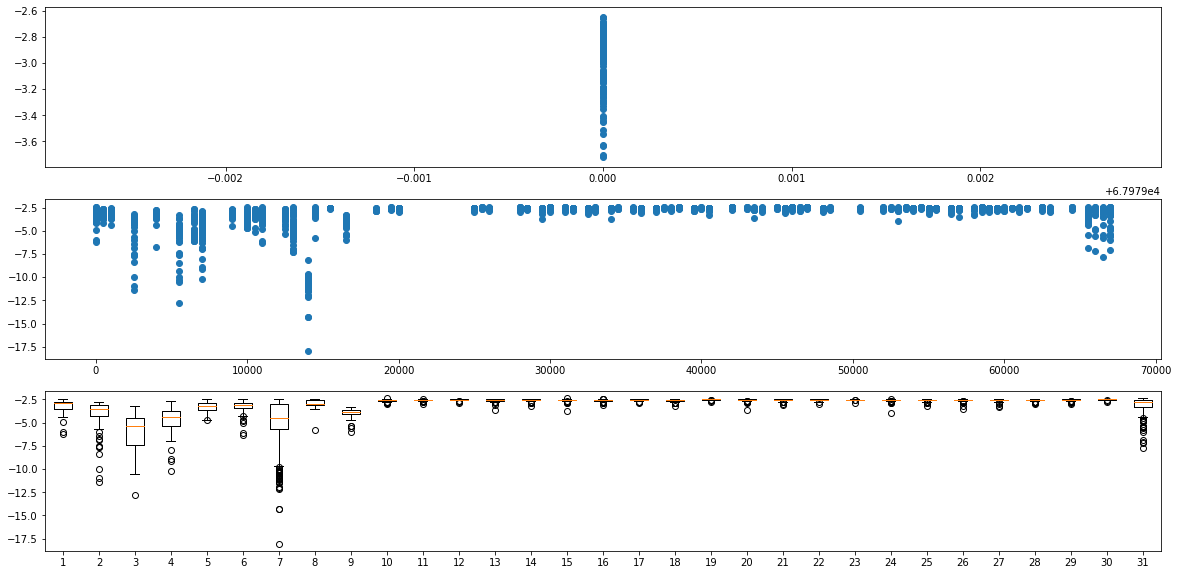

number of points: 128
12. trace test: fop-small-HotSpot-d-l64-p4096-w100000i.analyzed-1.pkl


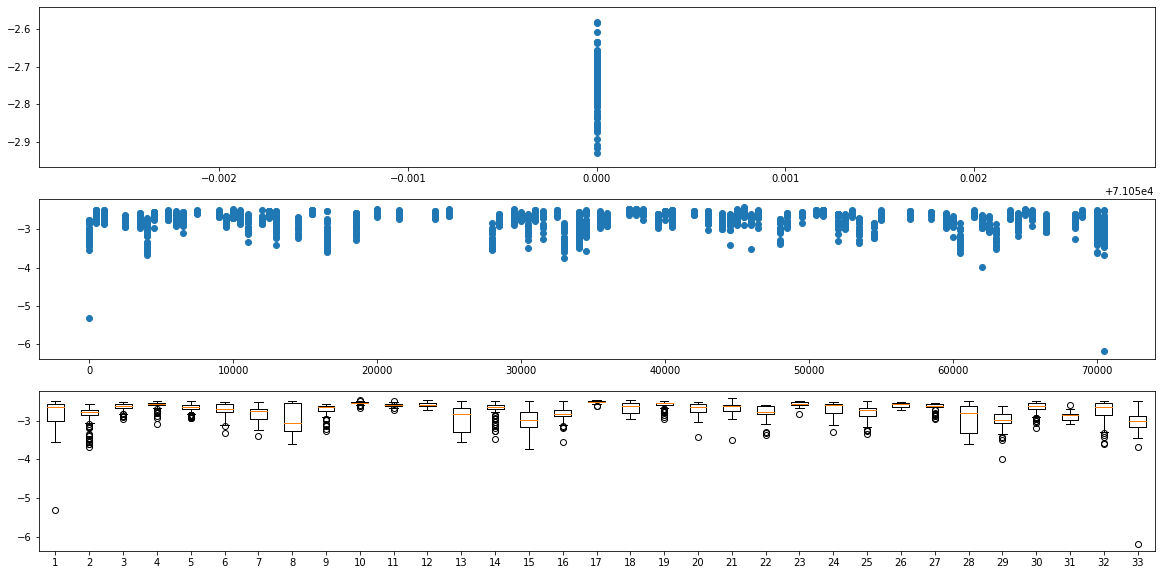

number of points: 128
13. trace test: avrora-small-HotSpot-d-l64-p4096-w100000i.analyzed-1.pkl


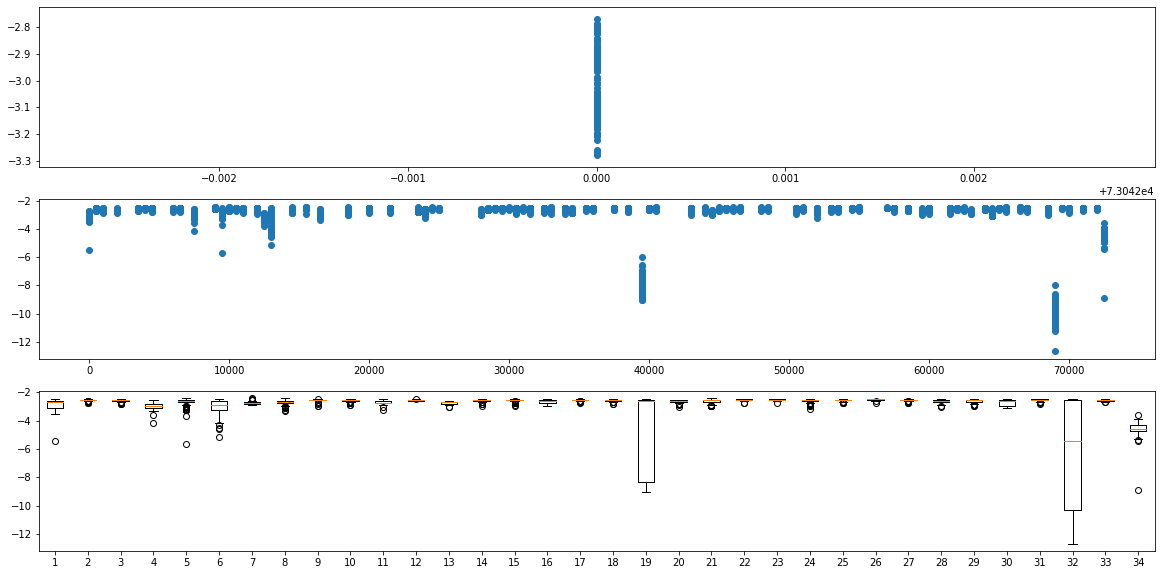

number of points: 128
14. trace test: gcc-ref-cc12-d-l64-p4096-w100000i.analyzed-1.pkl


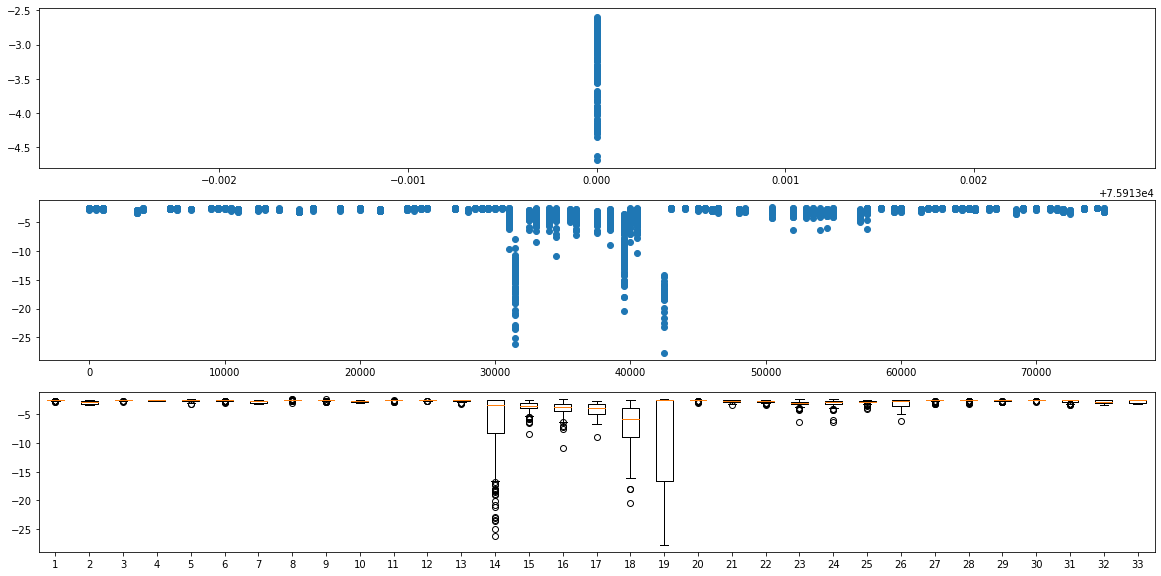

number of points: 128
15. trace test: gcc-ref-cc15-d-l64-p4096-w100000i.analyzed-1.pkl


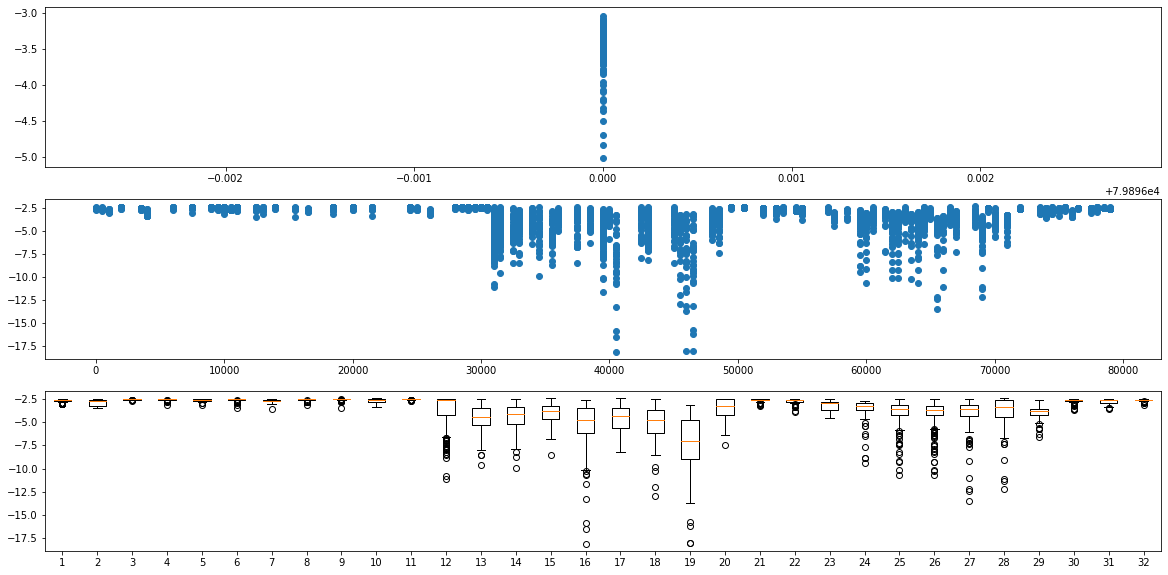

number of points: 128
16. trace test: sunflow-small-JikesRVM-d-l64-p4096-w100000i.analyzed-1.pkl


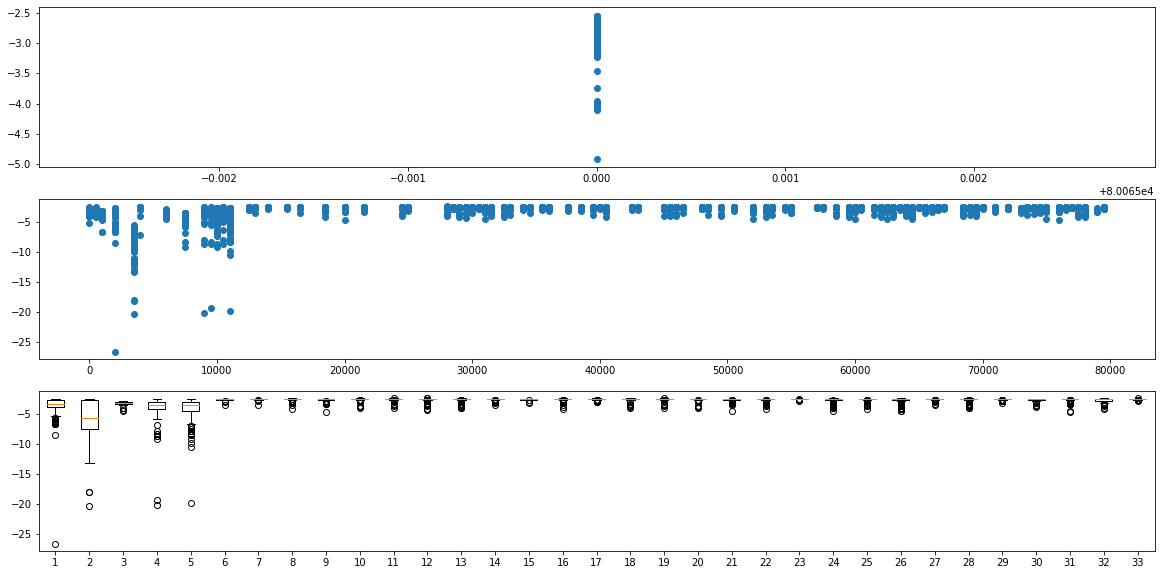

number of points: 128
17. trace test: lusearch-small-HotSpot-d-l64-p4096-w100000i.analyzed-1.pkl


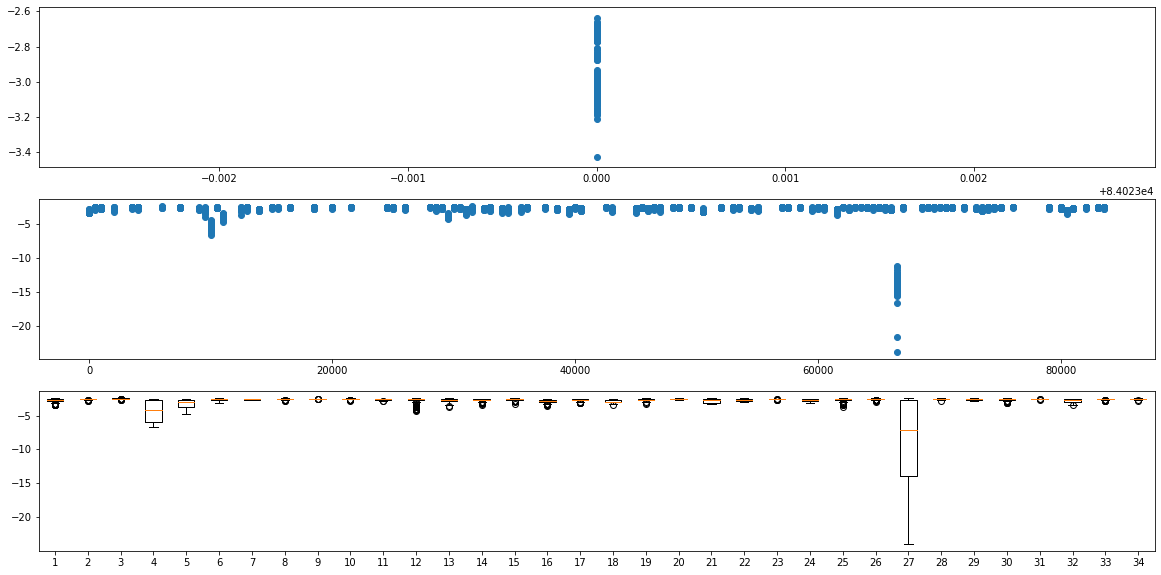

number of points: 128
18. trace test: batik-small-HotSpot-d-l64-p4096-w100000i.analyzed-1.pkl


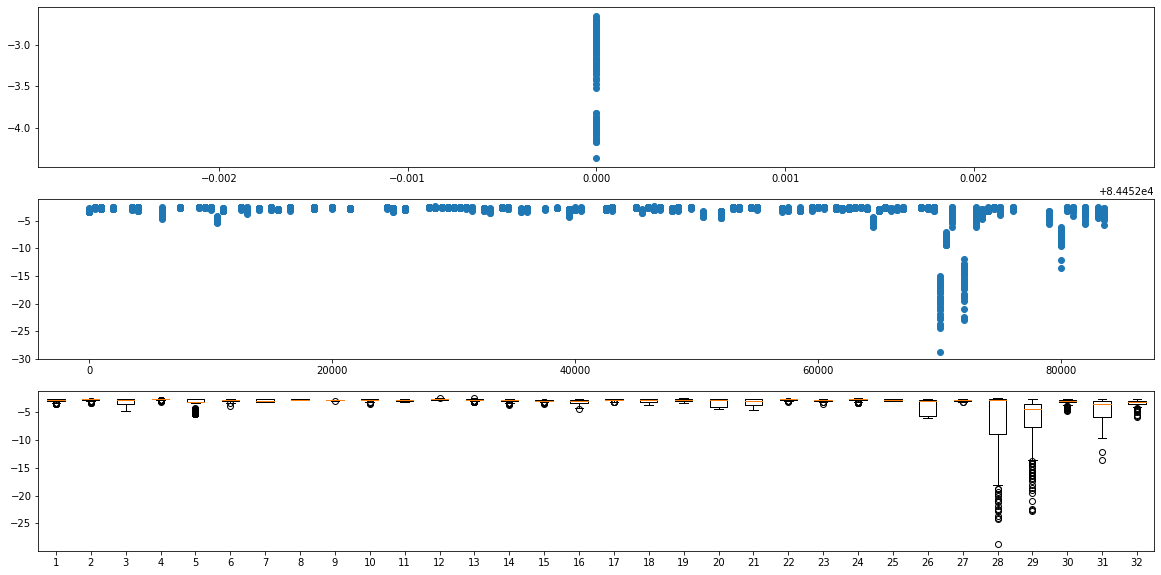

number of points: 128
19. trace test: fop-small-J9-d-l64-p4096-w100000i.analyzed-1.pkl


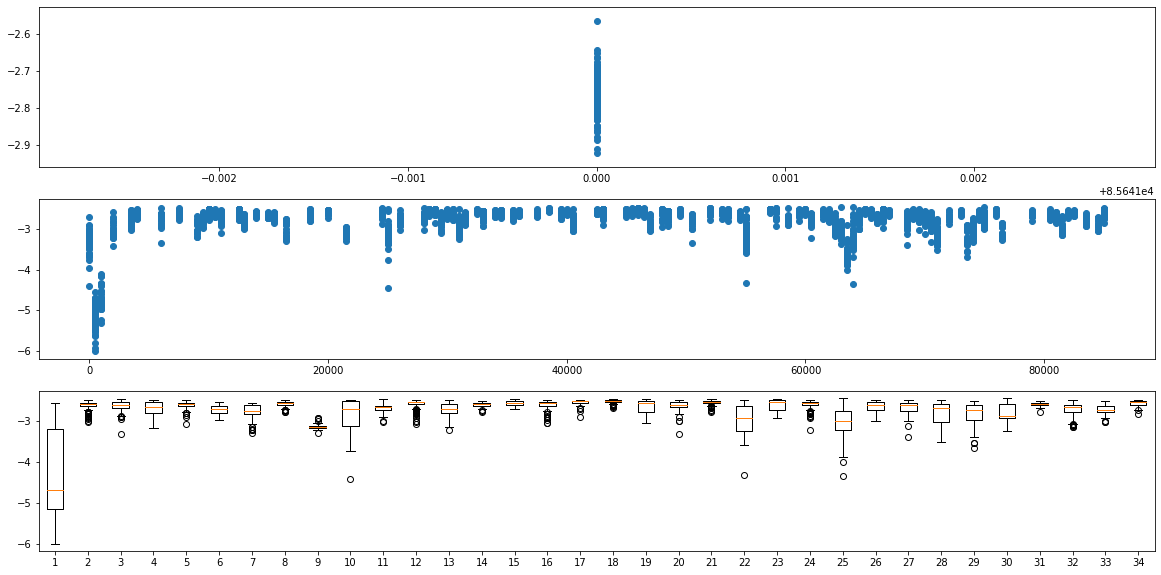

number of points: 128
20. trace test: luindex-default-HotSpot-d-l64-p4096-w100000i.analyzed-1.pkl


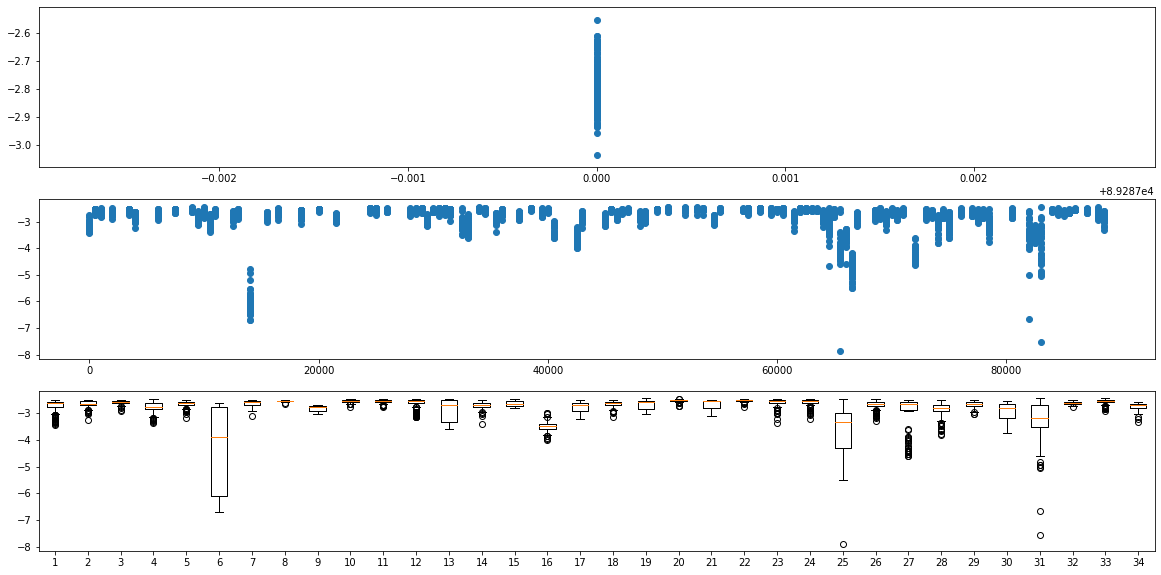

number of points: 128
21. trace test: xalan-small-J9-d-l64-p4096-w100000i.analyzed-1.pkl


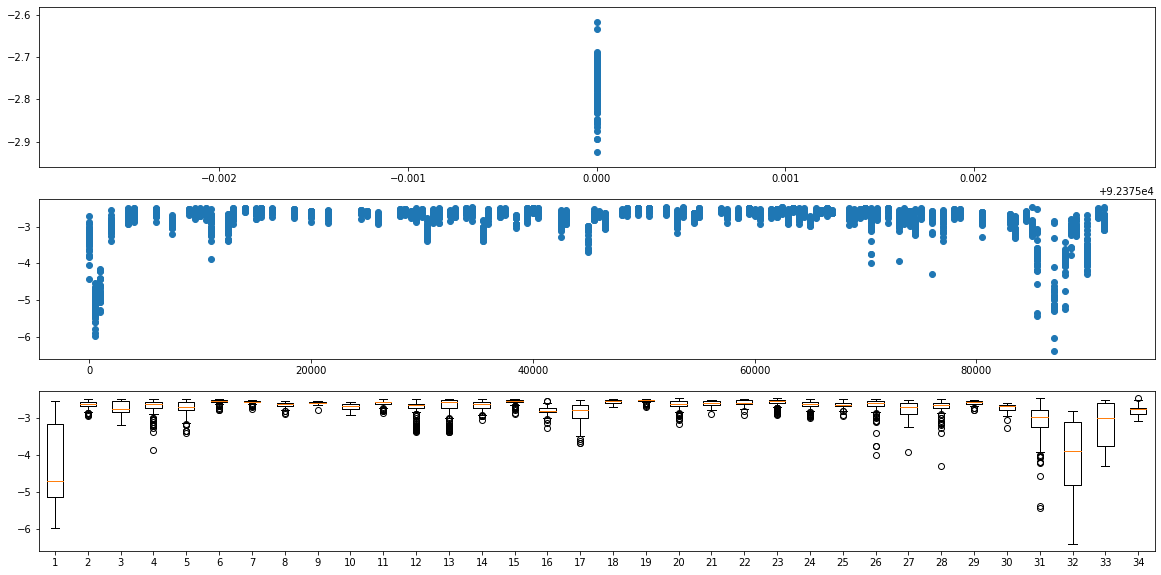

number of points: 128
22. trace test: xalan-small-HotSpot-d-l64-p4096-w100000i.analyzed-1.pkl


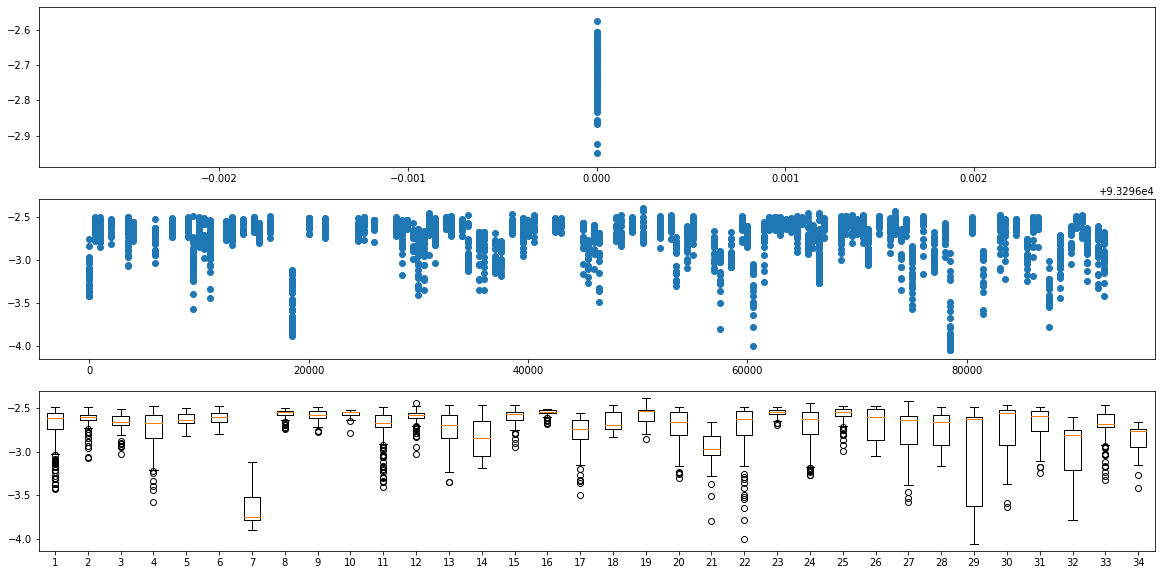

number of points: 128
23. trace test: sunflow-small-J9-d-l64-p4096-w100000i.analyzed-1.pkl


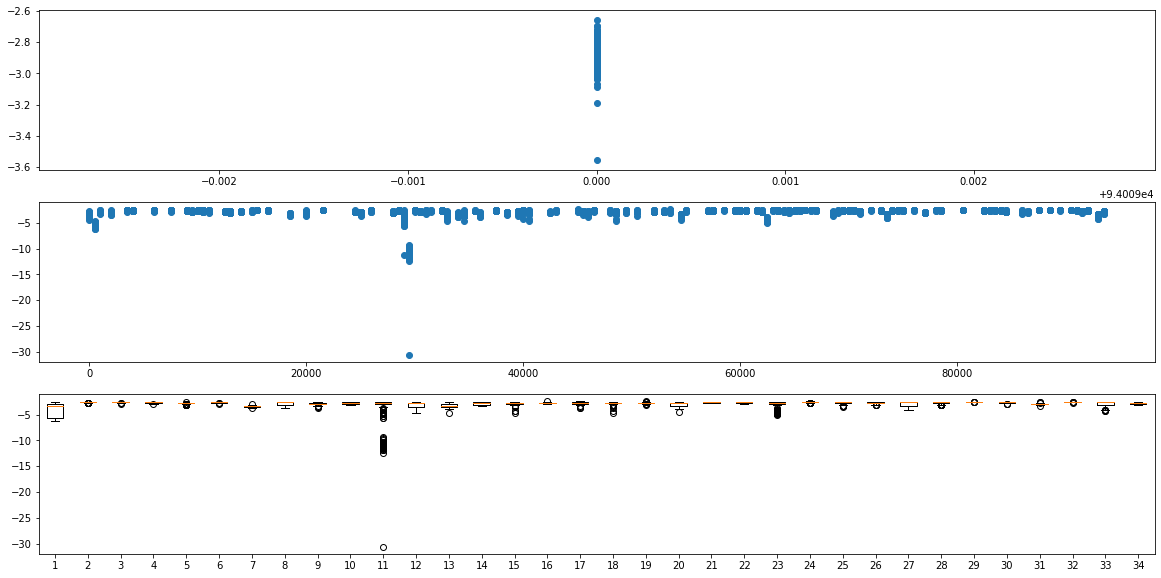

number of points: 128
24. trace test: lusearch-small-J9-d-l64-p4096-w100000i.analyzed-1.pkl


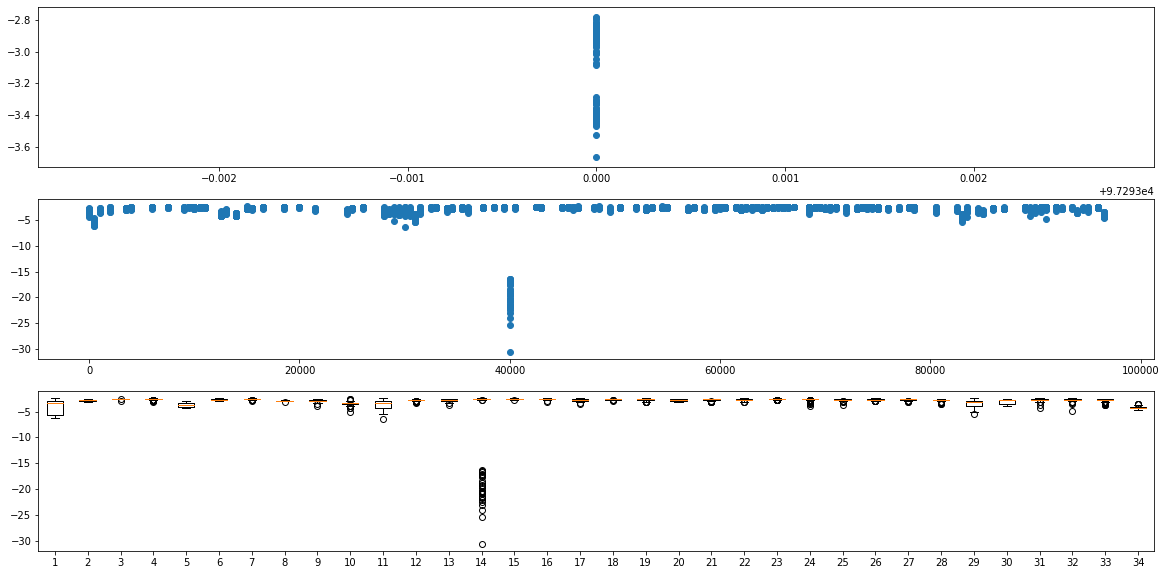

number of points: 128
25. trace test: avrora-default-HotSpot-d-l64-p4096-w100000i.analyzed-1.pkl


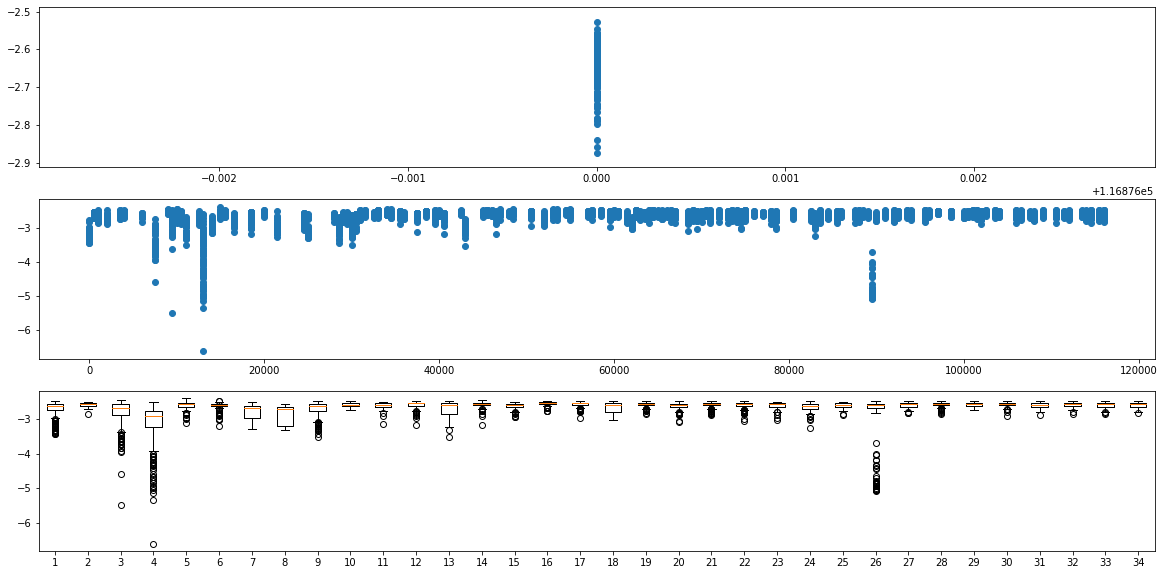

number of points: 128
26. trace test: luindex-default-JikesRVM-d-l64-p4096-w100000i.analyzed-1.pkl


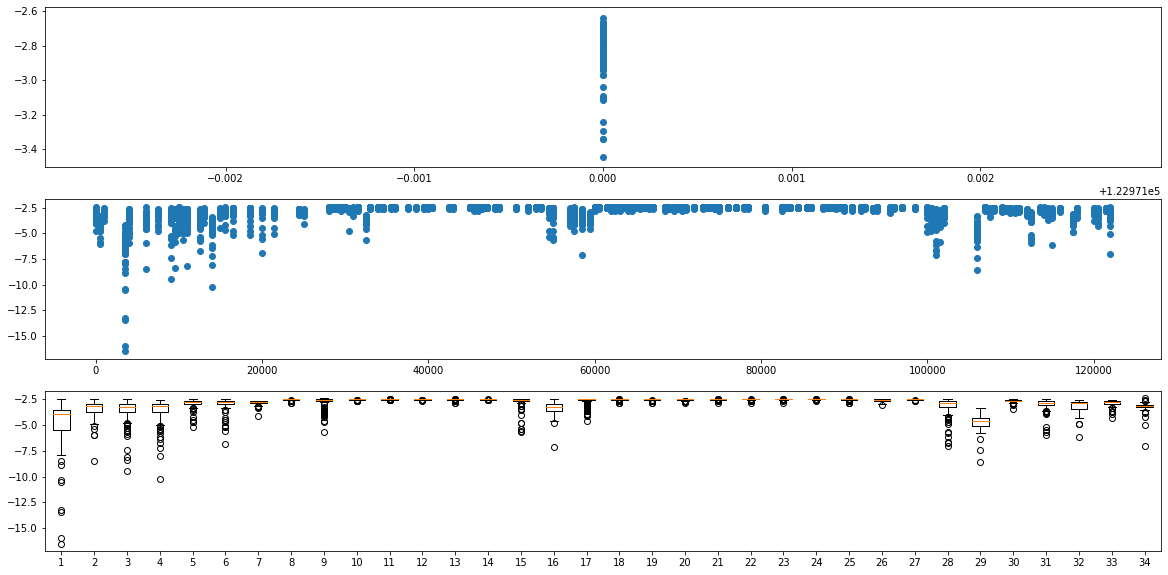

number of points: 128
27. trace test: avrora-small-J9-d-l64-p4096-w100000i.analyzed-1.pkl


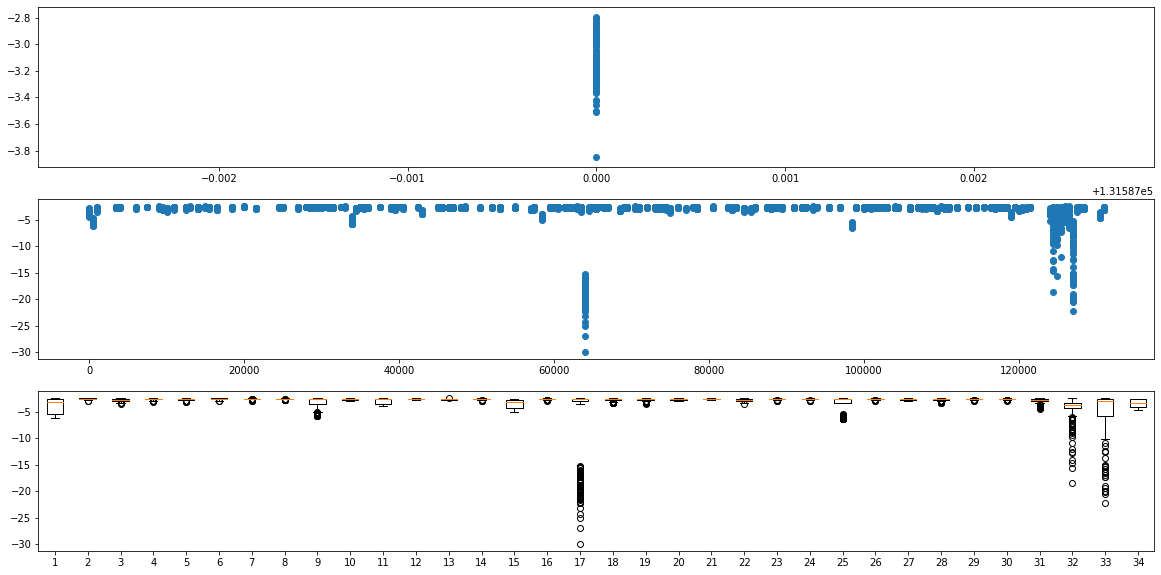

number of points: 128
28. trace test: pmd-default-JikesRVM-d-l64-p4096-w100000i.analyzed-1.pkl


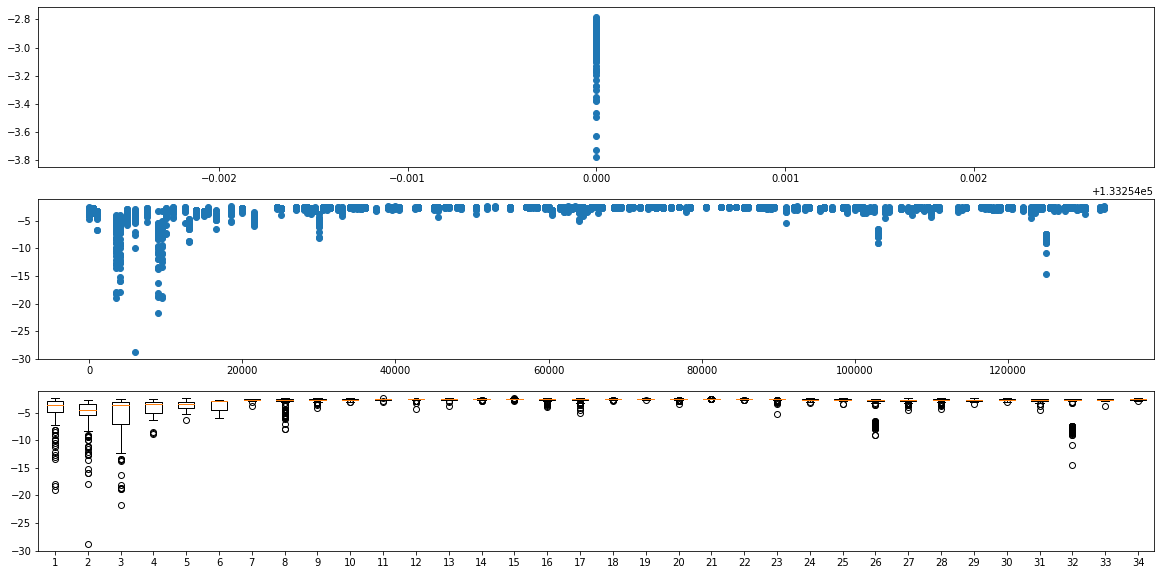

number of points: 128
29. trace test: batik-small-J9-d-l64-p4096-w100000i.analyzed-1.pkl


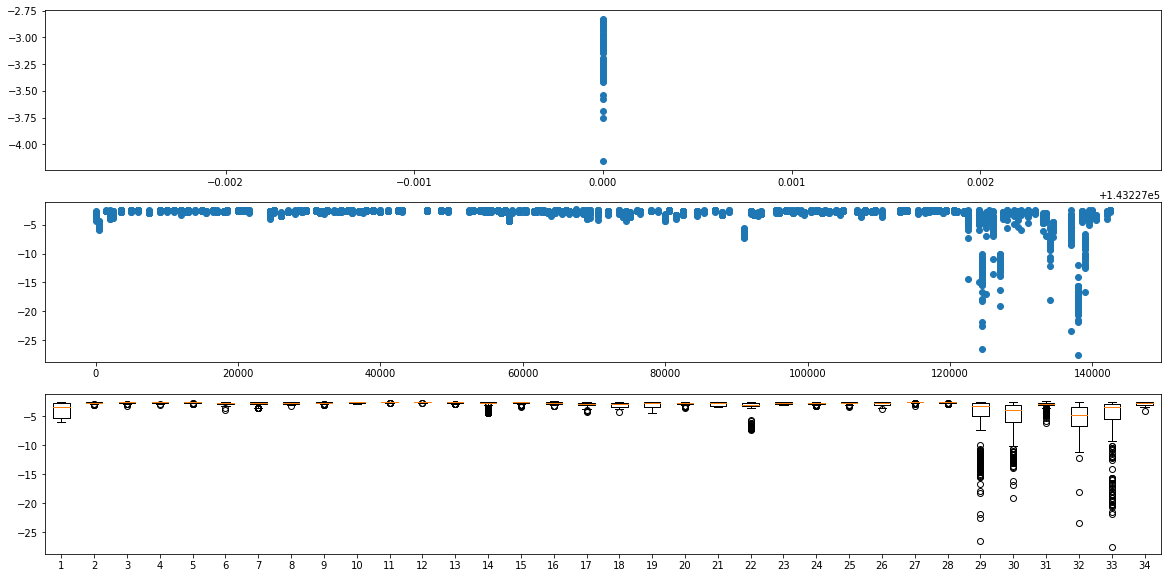

number of points: 128
30. trace test: fop-default-HotSpot-d-l64-p4096-w100000i.analyzed-1.pkl


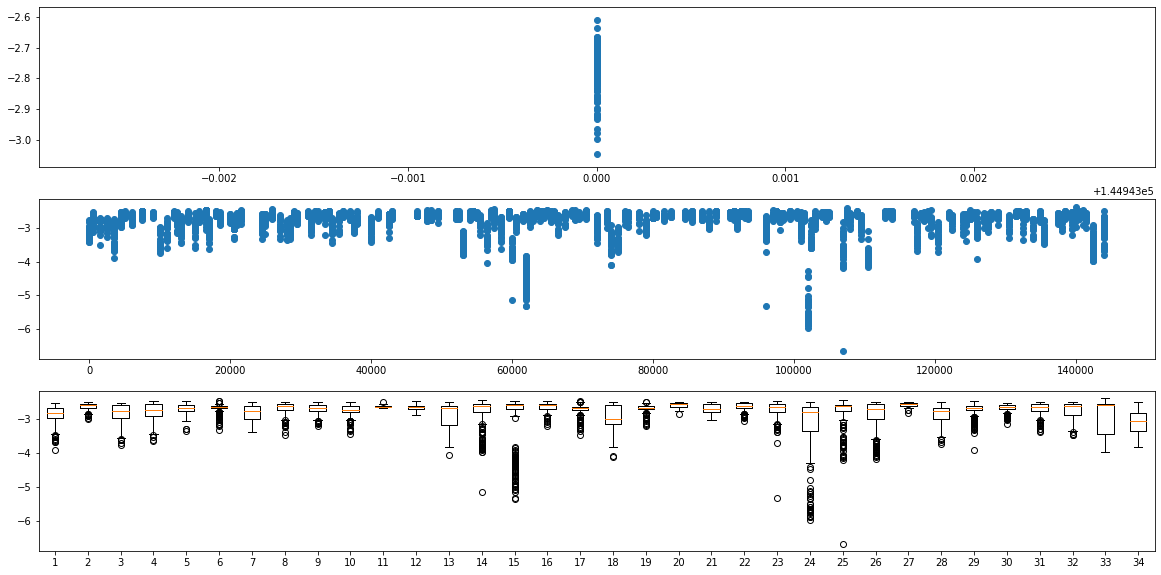

number of points: 0
31. trace test: sixtrack-ref-sixtrack-d-l64-p4096-w100000i.analyzed-1.pkl


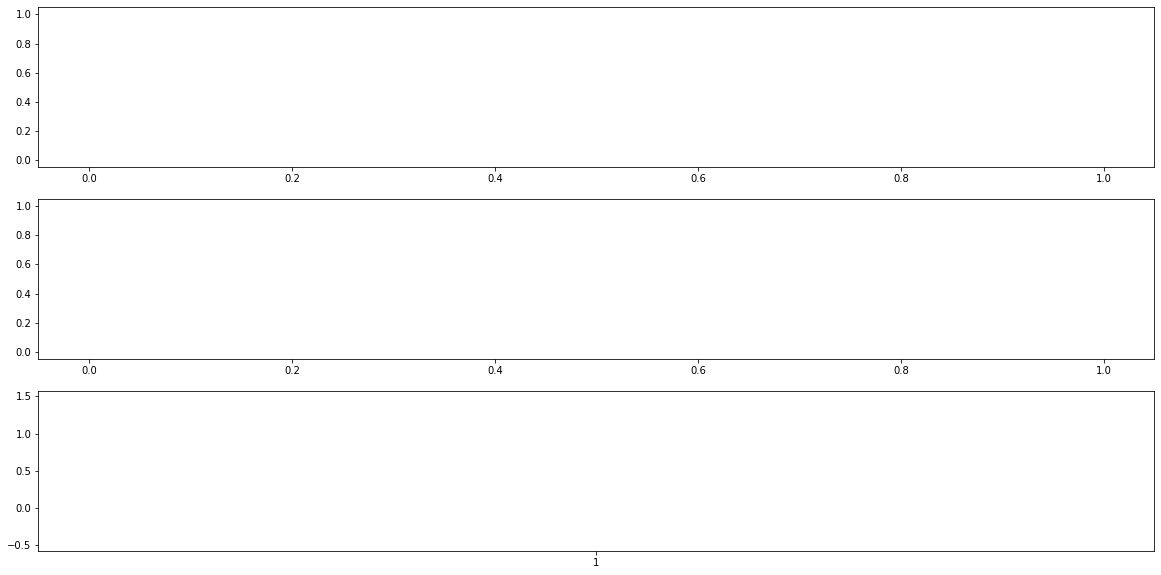

In [23]:
for idx1, trace_test in enumerate(trace_list):
    boxplot_dict = {}
    length_list = []
    trace_point = []
    kl_list = []
    avgkl_list = []
    fig, axs = plt.subplots(3, 1, figsize=(20,10))
    #     print("Seed: {}".format(seed))
    for seed in seeds:
        for trace_train in trace_list:

#             if trace_train == trace_test:
#                 continue
            
            if trace_length_dict[trace_test.split('.p')[0]] > 1000000:
                continue
            
            test_kldiv = []
            
            for key in result[trace_train][trace_test][seed].keys():
                test_trace_length = trace_length_dict[trace_train.split('.p')[0]]
                
                try:
#                     if key > length_min:
#                         continue
                    test_kldiv.append(-result[trace_train][trace_test][seed][key]["average_loglikelihood"])
                    
                    trace_point.append(key)
                    kl_list.append(test_kldiv[-1])
                    
                except (IndexError, TypeError):
                    continue

            average_kldiv = np.mean(test_kldiv)
            
            length_list.append(trace_length_dict[trace_test.split('.p')[0]])
            avgkl_list.append(average_kldiv)

            ### temporarily commented out
#     sort_ids = np.argsort(length_list)
#     axs[0].scatter(np.array(length_list)[sort_ids], 
#             np.array(avgkl_list)[sort_ids])
    
#     sort_ids = np.argsort(trace_point)
#     axs[1].scatter(np.array(trace_point)[sort_ids], 
#             np.array(kl_list)[sort_ids])
    
    for idx, point in enumerate(trace_point):
        point_trace_p = 0.03 * trace_length_dict[trace_test.split('.p')[0]]
        if int(point/point_trace_p) not in boxplot_dict.keys():
            boxplot_dict[int(point/point_trace_p)] = []
            
        boxplot_dict[int(point/point_trace_p)].append(kl_list[idx])
        
    #     axs[1].scatter(np.array(trace_points)[sort_ids], 
    #             np.array(avgkl_list)[sort_ids])

    print("number of points: {}".format(len(length_list)))
    # plt.legend()
    # axs[0].xlabel("length(log scale)")
    # axs[0].xscale("log")
    # axs[0].ylabel("average log likelihood")
    # axs[0].title("Dependence of trace length on cross predictability of traces")

    key_list = np.sort(list(boxplot_dict.keys()))

    boxplot_mat = [ boxplot_dict[key] for key in key_list ]
#     axs[2].set_ylim([ -6, -2 ])
    axs[2].boxplot(boxplot_mat)

    print("{}. trace test: {}".format(idx1, trace_test))
    plt.show()
    # plt.savefig("test_trace_length_correlation_cross.png")